In [1]:
import numpy as np
import pandas as pd
import pickle   

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split, KFold, GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.metrics import roc_auc_score


from IPython.display import Image

from scipy.stats import mode
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston["data"]

data.shape

(506, 13)

In [6]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
target = boston["target"]

In [9]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Построить диаграмму рассеивания

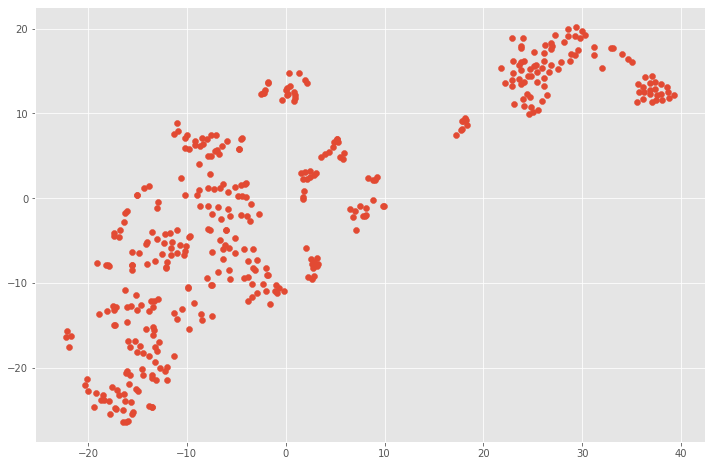

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

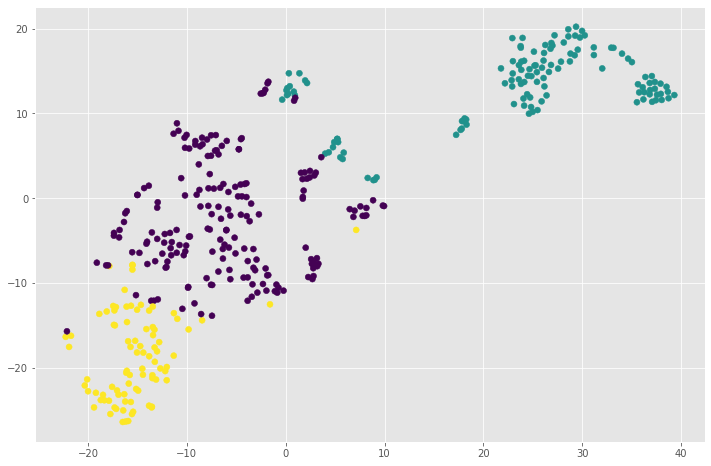

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [21]:
y_train.mean()

price    22.796535
dtype: float64

In [27]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))


Средние значения price:
Кластер 0: 24.958115183246072
Кластер 1: 16.165354330708666
Кластер 2: 27.788372093023252


In [28]:
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения CRIM:
Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [32]:
labels_test = kmeans.fit_predict(X_test_scaled)
print('Средние значения price:')
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: 16.710526315789473
Кластер 1: 21.652
Кластер 2: 33.871428571428574
Средние значения CRIM:
Кластер 0: 9.419181842105264
Кластер 1: 0.2244212
Кластер 2: 0.08618571428571427
